<a href="https://colab.research.google.com/github/Makena-WB/Book-Recommendation-Model/blob/main/dataExp_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [67]:
!pip install pandas
!pip install scipy



In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [13]:
pd.options.display.float_format = '{:.2f}'.format

ratings = pd.read_csv('/content/drive/MyDrive/BookData/ratings.csv')
books = pd.read_csv('/content/drive/MyDrive/BookData/books_enriched.csv')


In [14]:
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [15]:
ratings.shape

(5976479, 3)

In [16]:
for col in ratings.columns:
    print(f"Number of {col} is {ratings[col].nunique()}")

Number of user_id is 53424
Number of book_id is 10000
Number of rating is 5


In [17]:
books.shape

(10000, 30)

In [18]:
books.head(3).T

,0,1,2
Unnamed: 0,0,1,2
index,0,1,2
authors,['Suzanne Collins'],"['J.K. Rowling', 'Mary GrandPré']",['Stephenie Meyer']
average_rating,4.34,4.44,3.57
best_book_id,2767052,3,41865
book_id,1,2,3
books_count,272,491,226
description,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,Harry Potter's life is miserable. His parents ...,About three things I was absolutely positive.\...
genres,"['young-adult', 'fiction', 'fantasy', 'science...","['fantasy', 'fiction', 'young-adult', 'classics']","['young-adult', 'fantasy', 'romance', 'fiction..."
goodreads_book_id,2767052,3,41865


In [21]:
nums = books.select_dtypes(include=[np.number]).columns
cats = books.select_dtypes(exclude=[np.number]).columns

books[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10000.00,4999.50,2886.90,0.00,2499.75,4999.50,7499.25,9999.00
index,10000.00,4526.32,2567.92,0.00,2351.75,4567.50,6661.25,9999.00
average_rating,10000.00,4.00,0.25,2.47,3.85,4.02,4.18,4.82
best_book_id,10000.00,5471213.58,7827329.89,1.00,47911.75,425123.50,9636112.50,35534230.00
book_id,10000.00,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
books_count,10000.00,75.71,170.47,1.00,23.00,40.00,67.00,3455.00
goodreads_book_id,10000.00,5264696.51,7575461.86,1.00,46275.75,394965.50,9382225.25,33288638.00
isbn13,9415.00,9755044298883.46,442861920665.57,195170342.00,9780316192995.00,9780451528640.00,9780830777175.00,9790007672390.00
original_publication_year,9979.00,1981.99,152.58,-1750.00,1990.00,2004.00,2011.00,2017.00
pages,9927.00,359.42,216.95,0.00,250.00,336.00,424.00,5216.00


In [23]:
books[cats].describe().T

,count,unique,top,freq
authors,10000,5057,['Stephen King'],58
description,9943,9772,The first in a spectacularly genre-mashing adv...,4
genres,10000,4351,"['fantasy', 'fiction']",152
image_url,10000,6669,https://s.gr-assets.com/assets/nophoto/book/11...,3332
isbn,9300,9300,439023483,1
language_code,10000,41,eng,9680
original_title,9415,9274,,5
publishDate,9992,4679,"(None, None, None)",75
small_image_url,10000,6669,https://s.gr-assets.com/assets/nophoto/book/50...,3332
title,10000,9964,Selected Poems,4


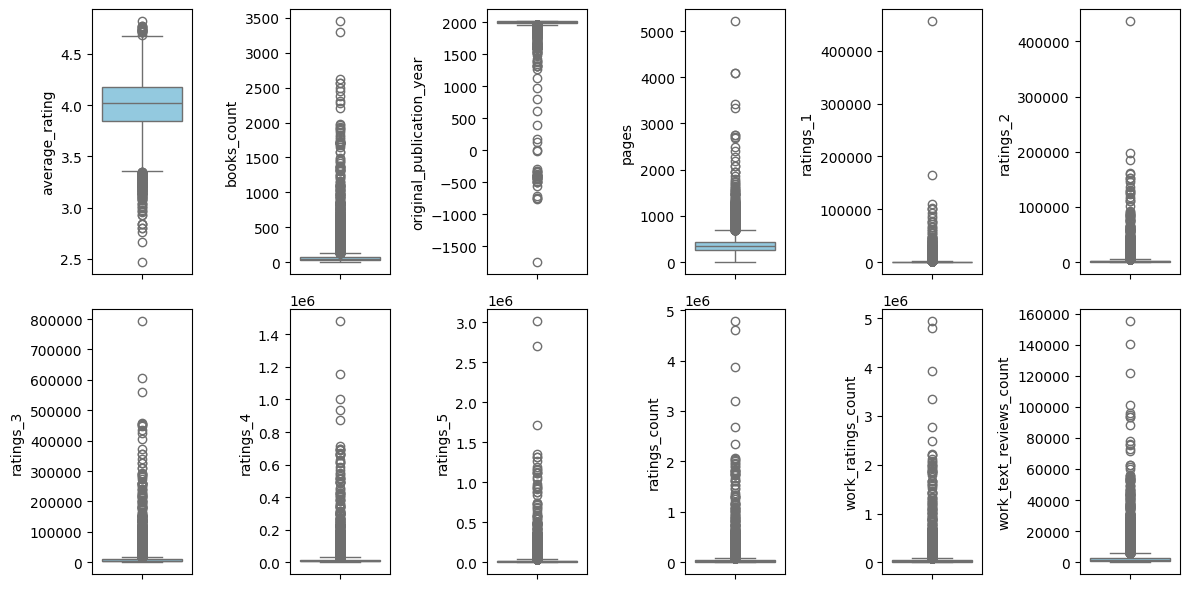

In [24]:
# select real numerical columns
not_unique_nums = ['average_rating', 'books_count', 'original_publication_year', 'pages',
                    'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'ratings_count',
                    'work_ratings_count', 'work_text_reviews_count']

# visualize
plt.figure(figsize=(12,6))
features = not_unique_nums
for i in range(0, len(features)):
    plt.subplot(2, 6, i+1)
    sns.boxplot(y=b[features[i]], color='skyblue')
    plt.tight_layout()

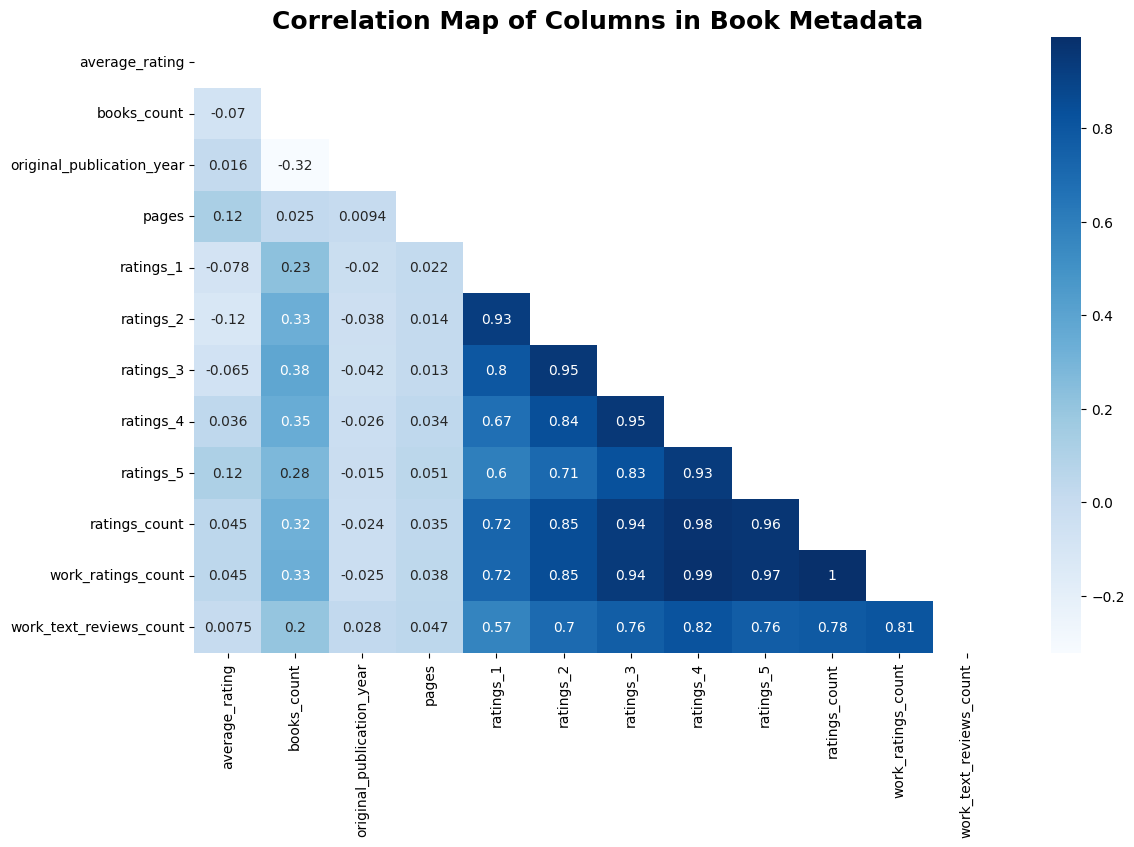

In [26]:
# build correlation table
corr = books[not_unique_nums].corr()

# visualize
upper_triangle = np.triu(corr)
plt.figure(figsize=(13,8))
sns.heatmap(corr, cmap="Blues", annot=True, mask=upper_triangle)
plt.title('Correlation Map of Columns in Book Metadata', weight='bold', fontsize=18)
plt.show()

Data Preprocessing

In [27]:
dataset = [ratings, books]
for data in dataset:
    print(data.isnull().values.any())

False
True


In [28]:
for data in dataset:
    print(data.duplicated().values.any())


False
False


In [29]:
Books = books.copy()

In [30]:
percent_missing = Books.isnull().sum() * 100 / len(Books)
missing_value = (pd.DataFrame({'percent_missing': percent_missing})).sort_values(by=['percent_missing'], ascending=False)
missing_value[missing_value['percent_missing']>0]

,percent_missing
isbn,7.00
original_title,5.85
isbn13,5.85
pages,0.73
description,0.57
original_publication_year,0.21
publishDate,0.08


In [31]:
Books[Books['original_publication_year'].isnull()][['original_publication_year', 'publishDate']]

,original_publication_year,publishDate
198,NaN,October 28th 2008
3249,NaN,February 7th 2006
3881,NaN,September 29th 2009
4252,NaN,November 10th 2010
4303,NaN,June 23rd 2009
4392,NaN,April 8th 2013
5001,NaN,November 9th 2004
5208,NaN,December 6th 2010
5648,NaN,October 11th 2006
7163,NaN,November 25th 2004


In [34]:
Books['publishDate'].replace(r"[(')]", "", regex=True, inplace=True)
Books['publishDate'] = Books['publishDate'].str.extract('(\d{4})$').fillna('')
Books['original_publication_year'] = Books['original_publication_year'].fillna(Books['publishDate'])

<ipython-input-34-eff548b4c373>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Books['publishDate'].replace(r"[(')]", "", regex=True, inplace=True)


In [35]:
# impute null in description with book's title.
Books['description'] = Books['description'].fillna(Books['title'])

# impute null in pages with median
Books['pages'] = Books['pages'].fillna(Books['pages'].median())

# drop unnecessary columns with null
Books = Books.drop(['isbn', 'original_title', 'isbn13', 'publishDate'], axis=1)

Feature Engineering

In [36]:
# keep important columns, drop the rest
cols_to_keep = ['book_id', 'title', 'authors', 'original_publication_year', 'pages', 'description', 'genres', 'average_rating', 'ratings_count', 'books_count']
Books = Books[cols_to_keep]

# display max column
with pd.option_context('display.max_colwidth', None):
    display(Books.head(5))

,book_id,title,authors,original_publication_year,pages,description,genres,average_rating,ratings_count,books_count
0,1,"The Hunger Games (The Hunger Games, #1)",['Suzanne Collins'],2008.00,374.00,"WINNING MEANS FAME AND FORTUNE.LOSING MEANS CERTAIN DEATH.THE HUNGER GAMES HAVE BEGUN. . . .In the ruins of a place once known as North America lies the nation of Panem, a shining Capitol surrounded by twelve outlying districts. The Capitol is harsh and cruel and keeps the districts in line by forcing them all to send one boy and once girl between the ages of twelve and eighteen to participate in the annual Hunger Games, a fight to the death on live TV.Sixteen-year-old Katniss Everdeen regards it as a death sentence when she steps forward to take her sister's place in the Games. But Katniss has been close to dead before—and survival, for her, is second nature. Without really meaning to, she becomes a contender. But if she is to win, she will have to start making choices that weight survival against humanity and life against love.","['young-adult', 'fiction', 'fantasy', 'science-fiction', 'romance']",4.34,4780653,272
1,2,"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)","['J.K. Rowling', 'Mary GrandPré']",1997.00,309.00,"Harry Potter's life is miserable. His parents are dead and he's stuck with his heartless relatives, who force him to live in a tiny closet under the stairs. But his fortune changes when he receives a letter that tells him the truth about himself: he's a wizard. A mysterious visitor rescues him from his relatives and takes him to his new home, Hogwarts School of Witchcraft and Wizardry.After a lifetime of bottling up his magical powers, Harry finally feels like a normal kid. But even within the Wizarding community, he is special. He is the boy who lived: the only person to have ever survived a killing curse inflicted by the evil Lord Voldemort, who launched a brutal takeover of the Wizarding world, only to vanish after failing to kill Harry.Though Harry's first year at Hogwarts is the best of his life, not everything is perfect. There is a dangerous secret object hidden within the castle walls, and Harry believes it's his responsibility to prevent it from falling into evil hands. But doing so will bring him into contact with forces more terrifying than he ever could have imagined.Full of sympathetic characters, wildly imaginative situations, and countless exciting details, the first installment in the series assembles an unforgettable magical world and sets the stage for many high-stakes adventures to come.","['fantasy', 'fiction', 'young-adult', 'classics']",4.44,4602479,491
2,3,"Twilight (Twilight, #1)",['Stephenie Meyer'],2005.00,501.00,"About three things I was absolutely positive.\n\nFirst, Edward was a vampire.\n\nSecond, there was a part of him—and I didn't know how dominant that part might be—that thirsted for my blood.\n\nAnd third, I was unconditionally and irrevocably in love with him.\n\nDeeply seductive and extraordinarily suspenseful, Twilight is a love story with bite.","['young-adult', 'fantasy', 'romance', 'fiction', 'paranormal']",3.57,3866839,226
3,4,To Kill a Mockingbird,['Harper Lee'],1960.00,324.00,"The unforgettable novel of a childhood in a sleepy Southern town and the crisis of conscience that rocked it, To Kill A Mockingbird became both an instant bestseller and a critical success when it was first published in 1960. It went on to win the Pulitzer Prize in 1961 and was later made into an Academy Award-winning film, also a classic.Compassionate, dramatic, and deeply moving, To Kill A Mockingbird takes readers to the roots of human behavior - to innocence and experience, kindness and cruelty, love and hatred, humor and pathos. Now with over 18 million copies in print and translated into forty languages, this regional story by a young Alabama woman claims universal appeal. Harper Lee always considered her book to be a simple love story. Today it is regarded as a masterpiece of American l

In [37]:
# delete unnecessary characters from authors, genres and description column
col_trans = ['authors', 'genres', 'description']
for col in col_trans:
    Books[col].replace(r"[\[\]\-\\\/\"—'()|:]", "", regex=True, inplace=True)
Books['description'].replace({"\n" : " ", "isbn13" : "", "isbn" : "", r"[0-9]{8,}" : "", r"[.,]" : ""}, regex=True, inplace=True)
Books['description'] = Books['description'].str.lower()

<ipython-input-37-add4ed3d2053>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Books[col].replace(r"[\[\]\-\\\/\"—'()|:]", "", regex=True, inplace=True)
<ipython-input-37-add4ed3d2053>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [38]:
with pd.option_context('display.max_colwidth', None):
    display(Books.sample(5))

,book_id,title,authors,original_publication_year,pages,description,genres,average_rating,ratings_count,books_count
8865,6047,Honolulu,Alan Brennert,2009.00,360.00,the story of a young immigrant bride in a ramshackle town that becomes a great modern cityin korea in those days newborn girls were not deemed important enough to be graced with formal names but were instead given nicknames which often reflected the parents; feelings on the birth of a daughter i knew a girl named anger and another called pity as for me my parents named me regrethonolulu is the rich unforgettable story of a young picture bride who journeys to hawaii in 1914 in search of a better lifeinstead of the affluent young husband and chance at an education that she has been promised she is quickly married off to a poor embittered laborer who takes his frustrations out on his new wife renaming herself jin she makes her own way in this strange land finding both opportunity and prejudice with the help of three of her fellow picture brides jin prospers along with her adopted city now growing from a small territorial capital into the great multicultural city it is today but paradise has its dark side whether its the daily struggle for survival in honolulus tenements or a crime that will become the most infamous in the islands historywith its passionate knowledge of people and places in hawaii far off the tourist track honolulu is most of all the spellbinding tale of four women in a new world united by dreams disappointment sacrifices and friendship,"historicalfiction, fiction, history, romance, travel, contemporary",4.02,15663,15
5871,6723,Girls of Riyadh,Rajaa Alsanea,2005.00,320.00,when rajaa alsanea boldly chose to open up the hidden world of saudi womentheir private lives and their conflicts with the traditions of their cultureshe caused a sensation across the arab world now in english alsanea’s tale of the personal struggles of four young upperclass women offers westerners an unprecedented glimpse into a society often veiled from view living in restrictive riyadh but traveling all over the globe these modern saudi women literally and figuratively shed traditional garb as they search for love fulfillment and their place somewhere in between western society and their islamic home,"fiction, chicklit, romance, contemporary",3.17,8200,48
9078,6983,"Forever Mine (The Moreno Brothers, #1)",Elizabeth Reyes,2010.00,335.00,seventeenyear old sarah’s life is turned upside down when her single mom is sent to jail she’s forced to move leaving behind everything she’s ever known including her best friend sydney lost and bitter in a new school her one goal is to save money and move back home then she meets angel morenoenigmatic but gorgeous angel is almost too good to be true except for one thing his archaic belief that guys and girls can never be “just friends” the problem? sarah’s best friend sydney is not a girlwith their unexpected romance intensifying to places neither ever experienced how long can sarah keep angel in the dark about the guy waiting for her back home?and you havent already read the forever mine mini prequel on my blog!,"romance, youngadult, contemporary, chicklit, fiction, sports",3.88,18346,15
7781,9428,Johnny Mnemonic,"William Gibson, Terry Bisson",1981.00,160.00,johnny is a courier he carries other peoples memories millions of them downloaded into his brain working out of beijing he is hired to carry a package to the states the hundreds of gigabytes stashed in his head are far beyond his capacity but as long as he gets downloaded quickly they wont do him any permanent harmbut headaches are the least of johnnys problems the americans arent the only ones who want the data the yakuza are after johnny too not all of him though all they need is his cryogenically frozen headin johnny mnemonic the sciencefiction guru of our age brings his aciddrenched tale of the near future to the screen for the first time containing william gibsons original short story his fu

In [39]:
# rename column and change year, pages, and book_count to integer
Books.rename(columns = {'original_publication_year':'year'}, inplace = True)
Books[['year', 'pages', 'books_count']] = Books[['year', 'pages', 'books_count']].astype(int)

Exploratory Data Analysis

<ipython-input-45-9a840f66cc5f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Books['average_rating'], color = '#0047AB')


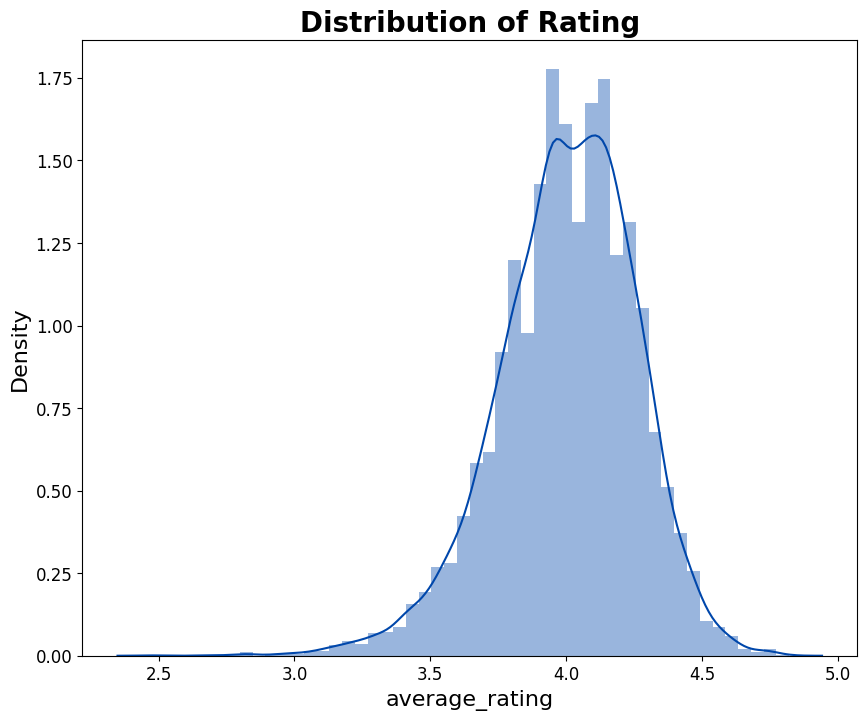

In [45]:
plt.figure(figsize=(10,8))
sns.distplot(Books['average_rating'], color = '#0047AB')
plt.title('Distribution of Rating', weight='bold', fontsize =20)
plt.xlabel('average_rating', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [47]:
av_rating_user = ratings.groupby('user_id')['rating'].mean().reset_index()

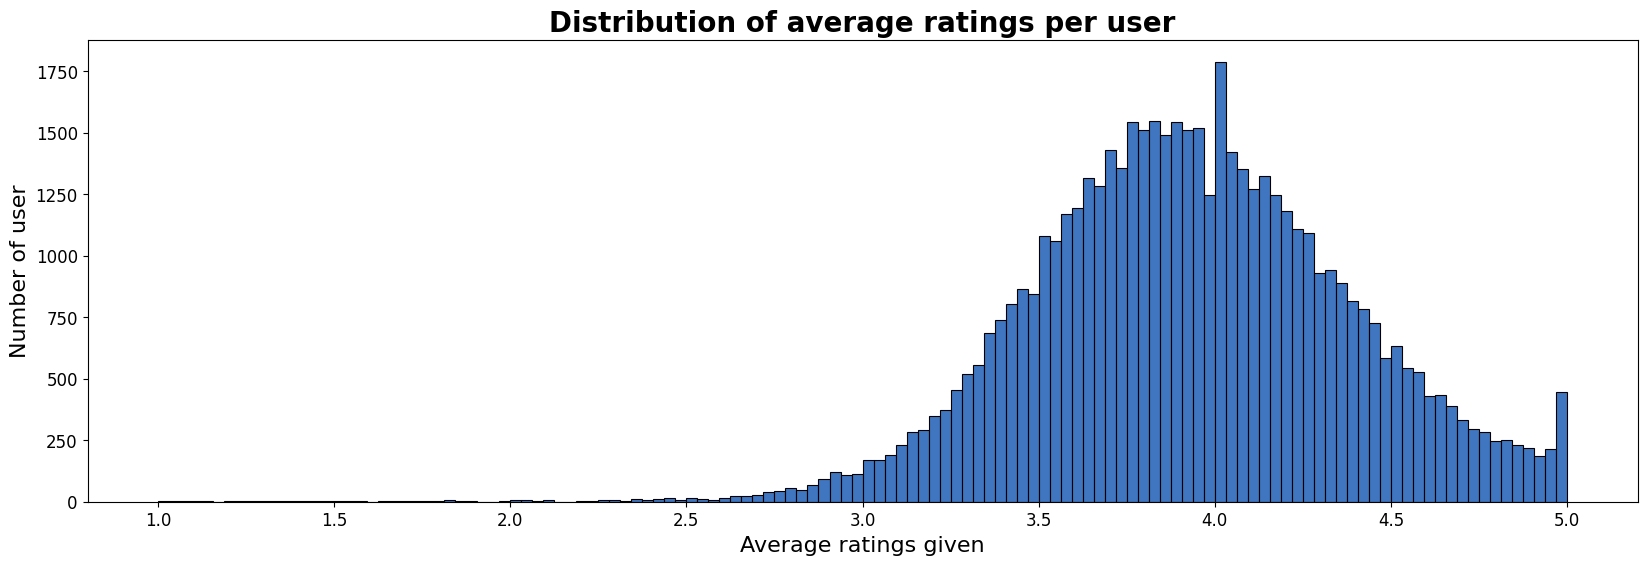

In [48]:
plt.figure(figsize=(20,6))
sns.histplot(data=av_rating_user, x='rating', color='#0047AB')
plt.title('Distribution of average ratings per user', weight='bold', fontsize=20)
plt.xlabel('Average ratings given', fontsize=16)
plt.ylabel('Number of user', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

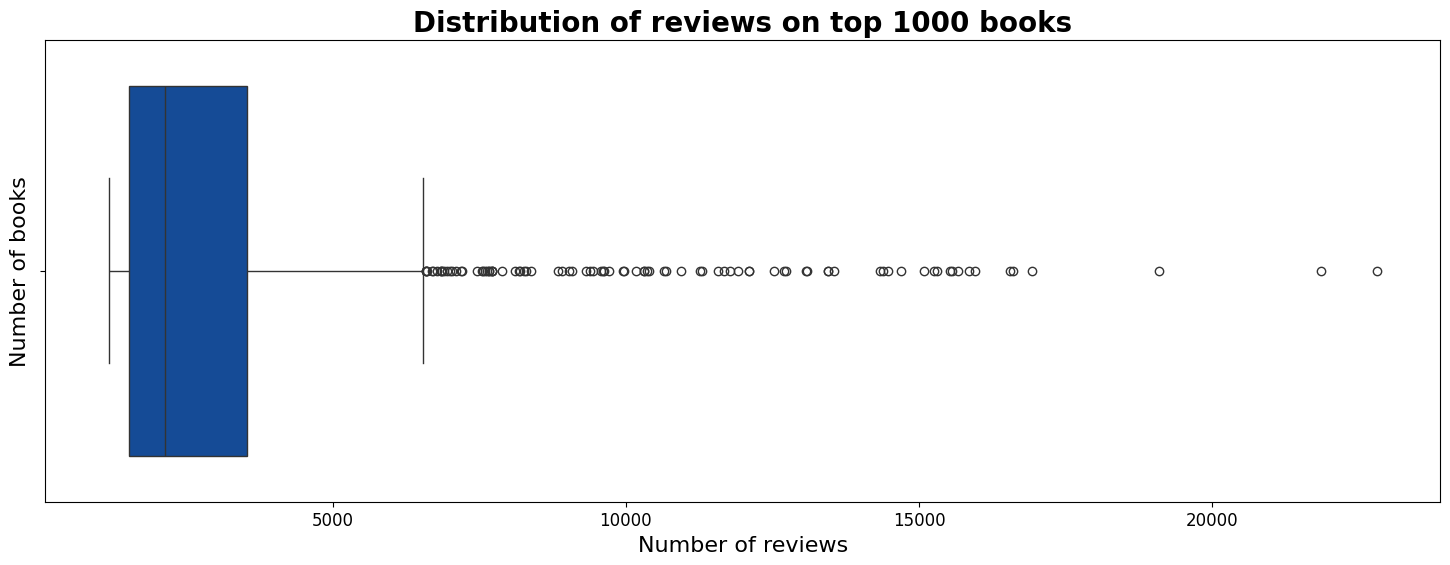

In [50]:
# ratings per book
ratings_per_book = (ratings.groupby('book_id')['rating'].count().reset_index()).sort_values(by='rating', ascending=False)

# visualize
plt.figure(figsize=(18,6))
sns.boxplot(data=ratings_per_book.head(1000), x='rating', color = '#0047AB')
plt.title('Distribution of reviews on top 1000 books', weight='bold', fontsize=20)
plt.xlabel('Number of reviews', fontsize=16)
plt.ylabel('Number of books', fontsize=16)
plt.xticks(fontsize=12)
plt.show()

In [51]:
ratings_per_book['rating'].describe()

,rating
count,10000.00
mean,597.65
std,1267.29
min,8.00
25%,155.00
50%,248.00
75%,503.00
max,22806.00


In [53]:
q3, q1 = np.percentile(ratings_per_book, [75 ,25])
iqr = q3 - q1
maximum = q3 + (1.5 * iqr)
outlier_books = len(ratings_per_book[ratings_per_book['rating'] > maximum])
print(outlier_books)

26


In [55]:
book_per_user = ratings.groupby('user_id')['rating'].count().reset_index()

<ipython-input-56-e6f56a4d9e70>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(book_per_user['rating'], color='#0047AB')


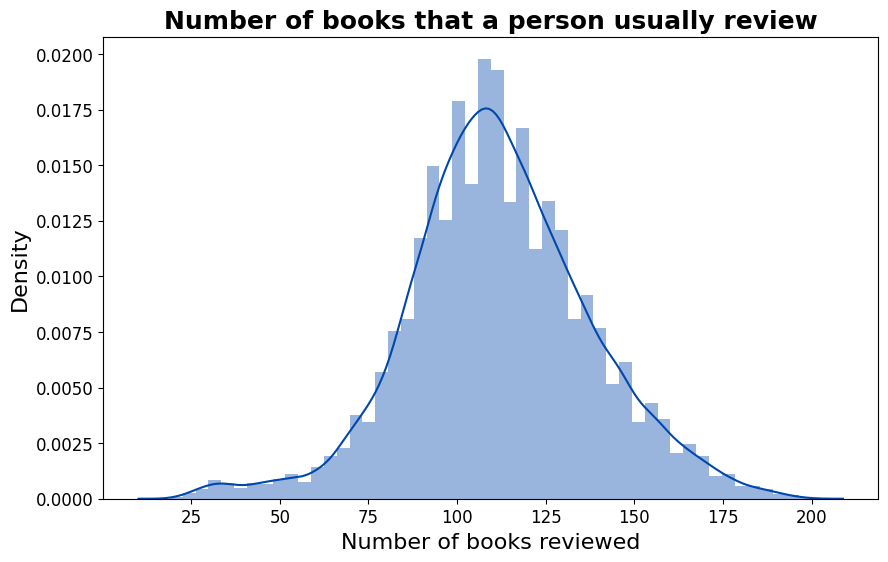

In [56]:
plt.figure(figsize=(10,6))
sns.distplot(book_per_user['rating'], color='#0047AB')
plt.title('Number of books that a person usually review', weight='bold', fontsize=18)
plt.xlabel('Number of books reviewed', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [57]:
book_per_user['rating'].describe()

,rating
count,53424.00
mean,111.87
std,26.07
min,19.00
25%,96.00
50%,111.00
75%,128.00
max,200.00


In [58]:
book_per_user[book_per_user['rating'] == book_per_user['rating'].max()]['user_id'].values

array([12874, 30944])

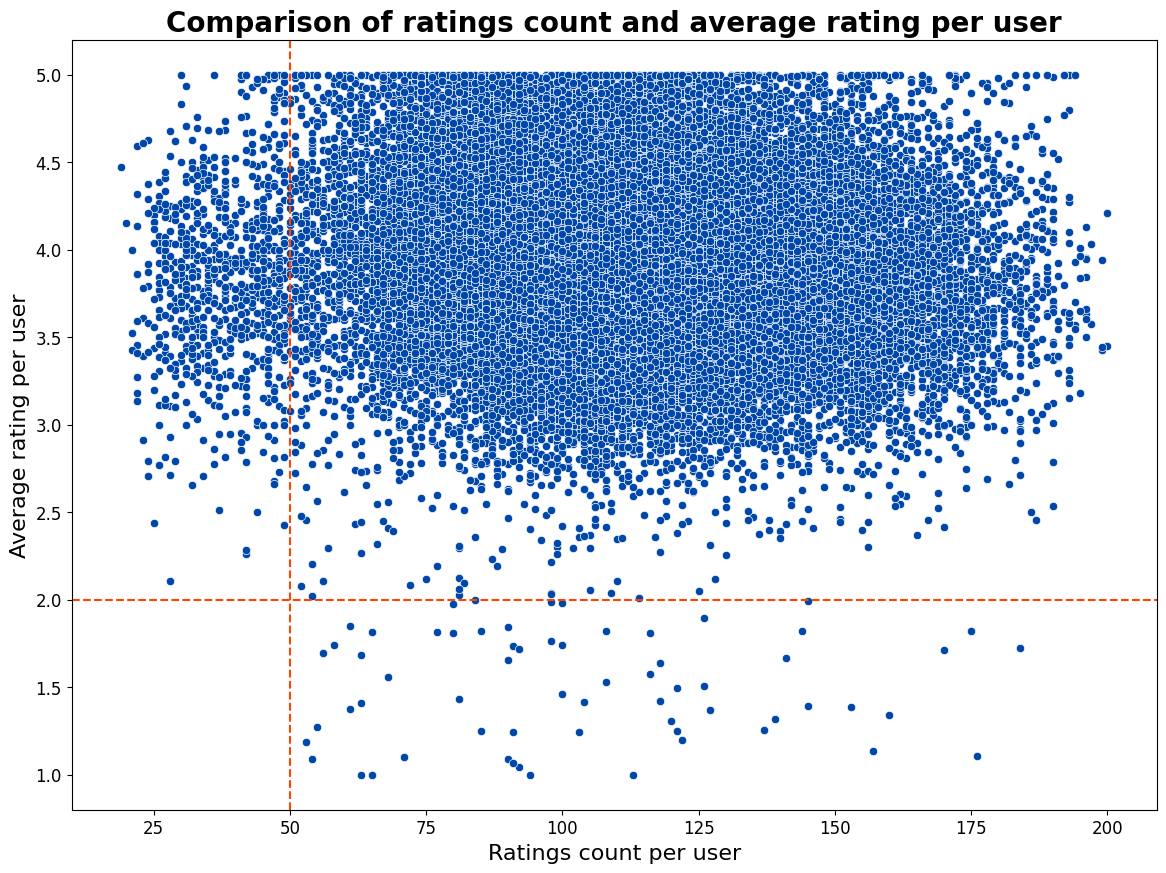

In [59]:
# merge average rating and number of ratings for each userid
id_merged = av_rating_user.merge(book_per_user, left_on="user_id", right_on="user_id")

# visualize
plt.figure(figsize=(14,10))
sns.scatterplot(x=id_merged['rating_y'], y=id_merged['rating_x'], color='#0047AB')
plt.title('Comparison of ratings count and average rating per user', weight='bold', fontsize=20)
plt.xlabel('Ratings count per user', fontsize=16)
plt.ylabel('Average rating per user', fontsize=16)
plt.axhline(y = 2, color = 'orangered', linestyle = '--')
plt.axvline(x = 50, color = 'orangered', linestyle = '--')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [61]:
# Books with most ratings
book_sorted_ratings_count = Books.sort_values('ratings_count', ascending=False)
book_sorted_ratings_count.head(10)

,book_id,title,authors,year,pages,description,genres,average_rating,ratings_count,books_count
0,1,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,2008,374,winning means fame and fortunelosing means cer...,"youngadult, fiction, fantasy, sciencefiction, ...",4.34,4780653,272
1,2,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",1997,309,harry potters life is miserable his parents ar...,"fantasy, fiction, youngadult, classics",4.44,4602479,491
2,3,"Twilight (Twilight, #1)",Stephenie Meyer,2005,501,about three things i was absolutely positive ...,"youngadult, fantasy, romance, fiction, paranormal",3.57,3866839,226
3,4,To Kill a Mockingbird,Harper Lee,1960,324,the unforgettable novel of a childhood in a sl...,"classics, fiction, historicalfiction, youngadult",4.25,3198671,487
4,5,The Great Gatsby,F. Scott Fitzgerald,1925,200,alternate cover edition isbn isbn13 the great...,"classics, fiction, historicalfiction, romance",3.89,2683664,1356
5,6,The Fault in Our Stars,John Green,2012,313,despite the tumorshrinking medical miracle tha...,"youngadult, romance, fiction, contemporary",4.26,2346404,226
6,7,The Hobbit,J.R.R. Tolkien,1937,366,in a hole in the ground there lived a hobbit n...,"fantasy, classics, fiction, youngadult",4.25,2071616,969
7,8,The Catcher in the Rye,J.D. Salinger,1951,277,the heronarrator of the catcher in the rye is ...,"classics, fiction, youngadult",3.79,2044241,360
9,10,Pride and Prejudice,Jane Austen,1813,279,alternate cover edition of isbn since its imme...,"classics, fiction, romance, historicalfiction",4.24,2035490,3455
8,9,"Angels & Demons (Robert Langdon, #1)",Dan Brown,2000,736,worldrenowned harvard symbologist robert langd...,"fiction, mystery, thriller, suspense, crime, h...",3.85,2001311,311


In [62]:
book_sorted_ratings = Books.sort_values('average_rating', ascending=False)
book_sorted_ratings.head(10)

,book_id,title,authors,year,pages,description,genres,average_rating,ratings_count,books_count
3353,3628,The Complete Calvin and Hobbes,Bill Watterson,2005,1456,box set book one book two book three c...,"comics, graphicnovels, fiction, classics",4.82,28900,14
3043,3275,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...","J.K. Rowling, Mary GrandPré",2003,2690,box set containing harry potter and the sorcer...,"fantasy, youngadult, fiction, classics",4.77,33220,11
810,862,"Words of Radiance (The Stormlight Archive, #2)",Brandon Sanderson,2014,1087,words of radiance book two of the stormlight a...,"fantasy, fiction",4.77,73572,34
6779,7947,ESV Study Bible,"Anonymous, Lane T. Dennis, Wayne A. Grudem",2002,2750,the esv study bible was designed to help you u...,"christian, nonfiction, religion, classics, his...",4.76,8953,96
7403,8854,Mark of the Lion Trilogy,Francine Rivers,1993,1468,this bestselling trilogy chronicles a tale of ...,"christian, historicalfiction, fiction, romance...",4.76,9081,6
4068,4483,It's a Magical World: A Calvin and Hobbes Coll...,Bill Watterson,1996,176,when cartoonist bill watterson announced that ...,"comics, graphicnovels, fiction",4.75,22351,21
387,422,"Harry Potter Boxset (Harry Potter, #1-7)",J.K. Rowling,1998,4100,over 4000 pages of harry potter and his world ...,"fantasy, youngadult, fiction, classics",4.74,190050,76
5593,6361,There's Treasure Everywhere: A Calvin and Hobb...,Bill Watterson,1996,176,in the world that calvin and his stuffed tiger...,"comics, fiction, graphicnovels",4.74,16766,22
5767,6590,The Authoritative Calvin and Hobbes: A Calvin ...,Bill Watterson,1990,254,a collection of calvin and hobbes cartoons the...,"comics, graphicnovels, fiction, classics",4.73,16087,21
3457,3753,"Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,2005,3342,six years of magic adventure and mystery make ...,"fantasy, fiction, youngadult, classics",4.73,24618,6


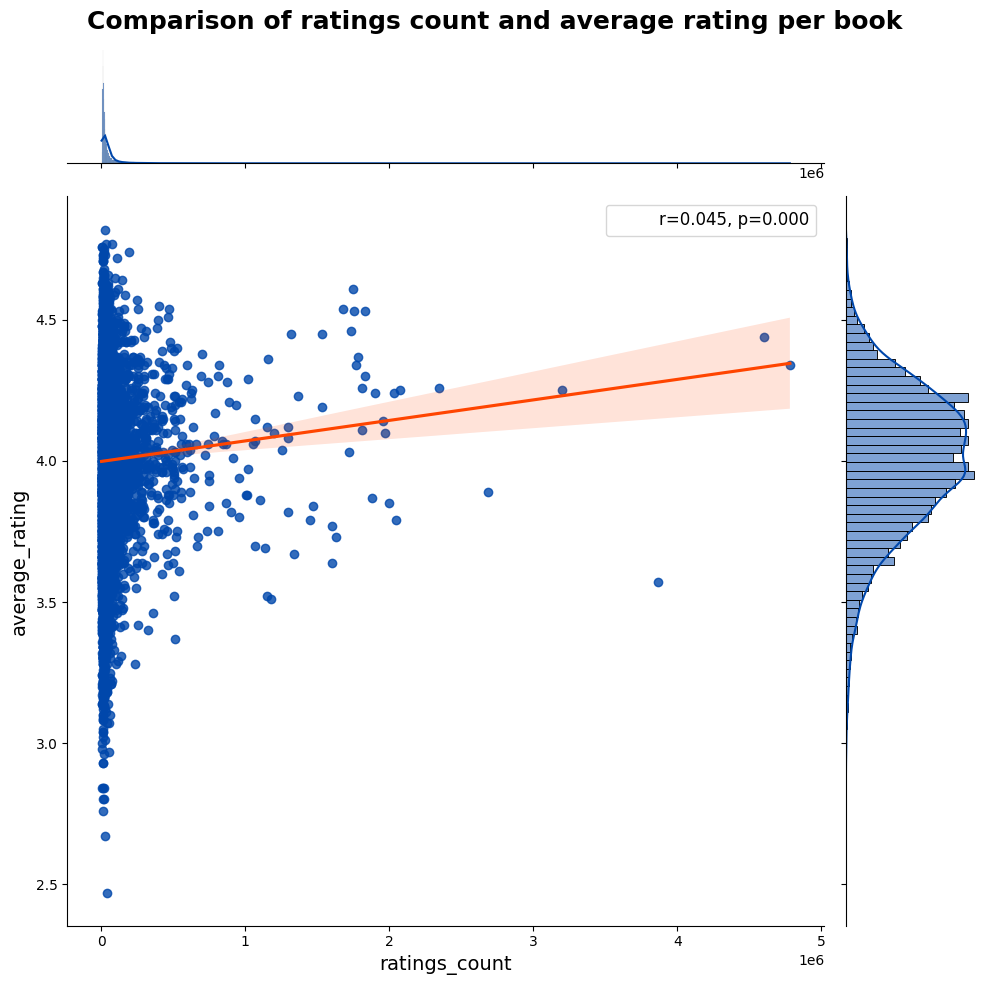

In [69]:
x = Books['ratings_count']
y = Books['average_rating']

# Pass x and y as keyword arguments instead of positional arguments
j = sns.jointplot(x='ratings_count', y='average_rating',
                  data=Books,  # Pass the DataFrame as data
                  height=10,
                  kind='reg',
                  color='#0047AB',
                  line_kws={'color':'orangered'})

# Assuming stats is imported correctly (e.g., from scipy import stats)
r, p = stats.pearsonr(x, y)

phantom, = j.ax_joint.plot([], [], linestyle="", alpha=0)
j.ax_joint.legend([phantom],['r={:.3f}, p={:.3f}'.format(r,p)], fontsize=12)
j.fig.suptitle('Comparison of ratings count and average rating per book', weight='bold', fontsize=18)
j.set_axis_labels('ratings_count', 'average_rating', fontsize=14)
j.figure.tight_layout()
plt.show()

In [70]:
#take 'Stephen King' as an example
auth = []
Books.authors.apply(lambda x: auth.append(x) if 'Stephen King' in x else [])
auth[:5]

['Stephen King',
 'Stephen King, Bernie Wrightson',
 'Stephen King',
 'Stephen King',
 'Stephen King']

In [71]:
# split authors in each books
a = []
Books.authors.apply(lambda x: a.append(x) if ',' in x else [])

# insert splitted author list in every row
authors_list = Books['authors'].apply(lambda x: [a for a in x.split(', ')] if ',' in x else x)
splitted_authors = authors_list.apply(lambda x: pd.Series(x)).stack().reset_index(level=1, drop=True)
splitted_authors.name = 'authors'

# remove previous author column and join the new splitted authors
Books = Books.drop('authors', axis=1).join(splitted_authors)

# take the first author for each book and remove the rest
Books = Books.drop_duplicates(subset='book_id', keep='first')


In [73]:
book_count_real = Books['authors'].value_counts()
book_count_real.head()

,count
authors,
James Patterson,96
Stephen King,80
Nora Roberts,63
Dean Koontz,51
Terry Pratchett,48


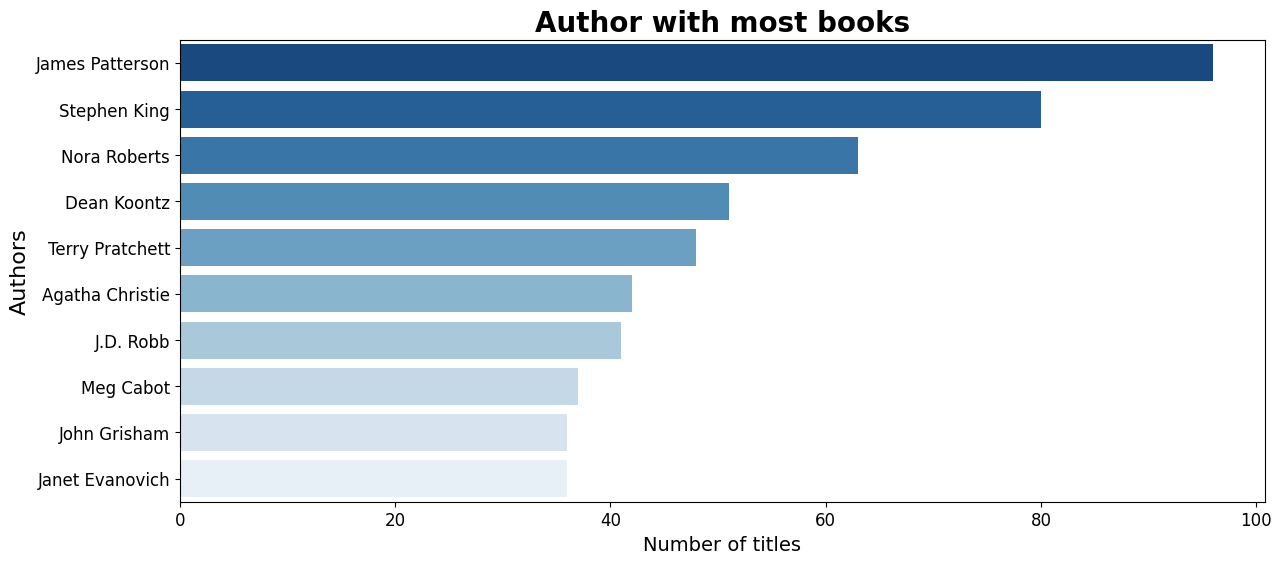

In [75]:
plt.figure(figsize=(14,6))
sns.barplot(x=book_count_real.head(10).values,
            y=book_count_real.head(10).index,
            hue=book_count_real.head(10).index,  # Assign y to hue
            palette='Blues_r',
            legend=False)  # Suppress legend
plt.title('Author with most books', weight='bold', fontsize=20)
plt.xlabel('Number of titles', fontsize=14)
plt.ylabel('Authors', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [76]:
popular_author = Books.groupby('authors')['ratings_count'].sum().sort_values(ascending = False)
popular_author.head(5)

,ratings_count
authors,
J.K. Rowling,16036005
Suzanne Collins,8646393
Stephenie Meyer,8512437
Stephen King,8250167
J.R.R. Tolkien,5454844


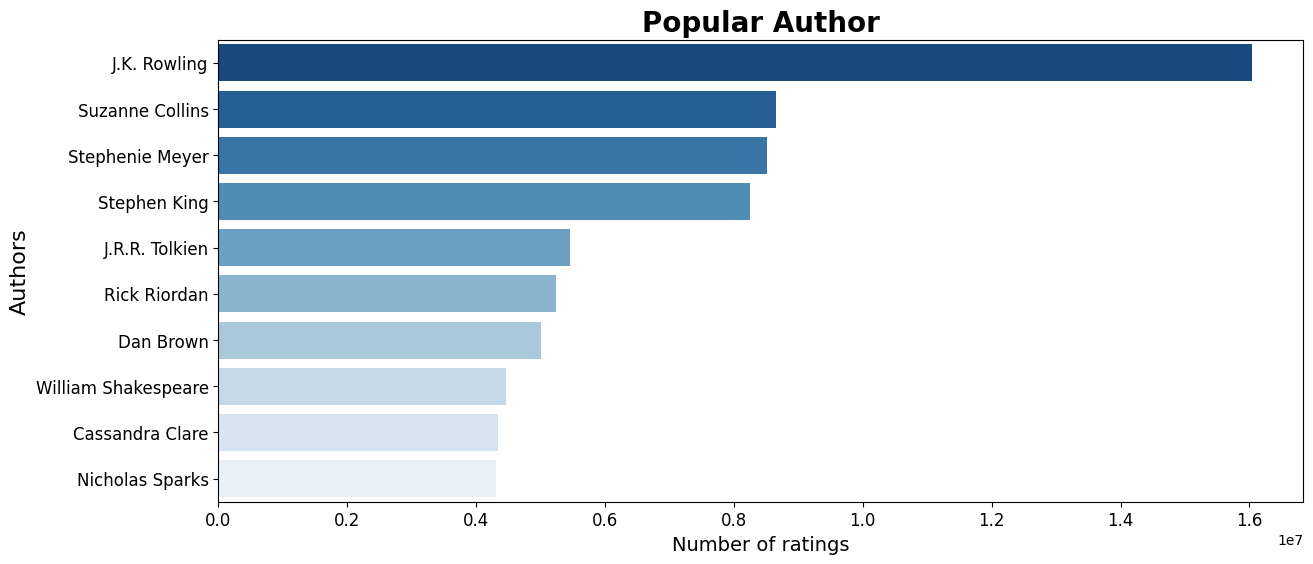

In [78]:
#visualize
plt.figure(figsize=(14,6))
sns.barplot(x=popular_author.head(10).values,
            y=popular_author.head(10).index,
            hue=popular_author.head(10).index,
           palette = 'Blues_r')
plt.title('Popular Author', weight='bold', fontsize=20)
plt.xlabel('Number of ratings', fontsize=14)
plt.ylabel('Authors', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


In [79]:
high_rating_author = Books.groupby('authors')['average_rating'].mean().sort_values(ascending = False)
high_rating_author.head(5)

,average_rating
authors,
Bill Watterson,4.70
Hafez,4.63
James E. Talmage,4.63
Eiichiro Oda,4.63
Angie Thomas,4.62


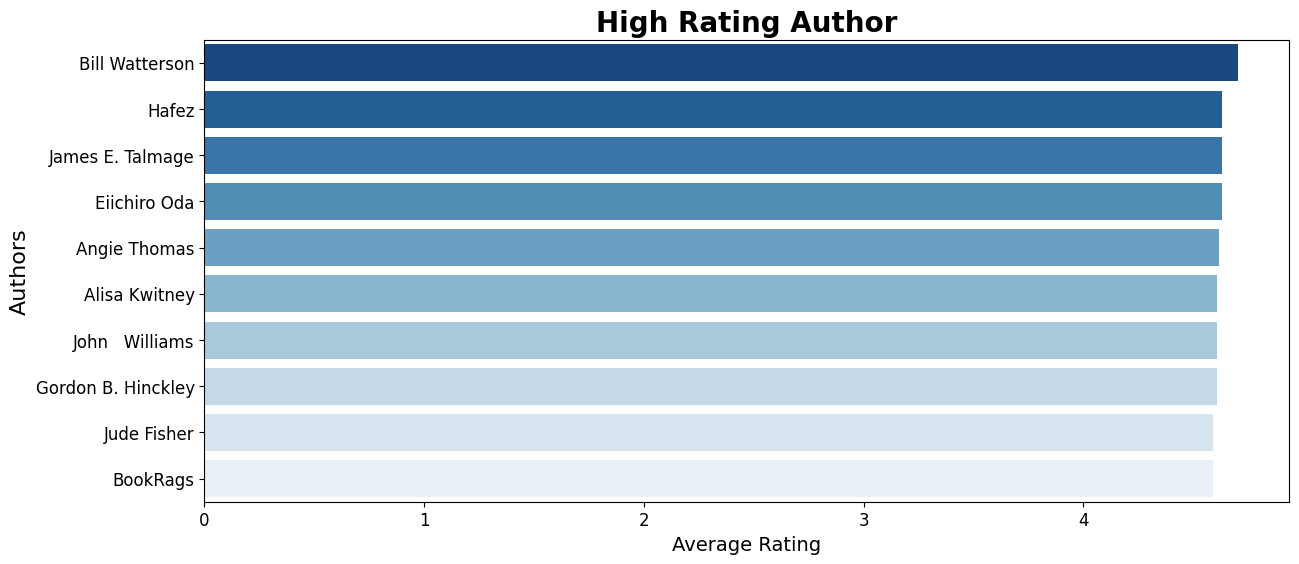

In [80]:
plt.figure(figsize=(14,6))
sns.barplot(x=high_rating_author.head(10).values,
            y=high_rating_author.head(10).index,
            hue=high_rating_author.head(10).index,
           palette = 'Blues_r')
plt.title('High Rating Author', weight='bold', fontsize=20)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Authors', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

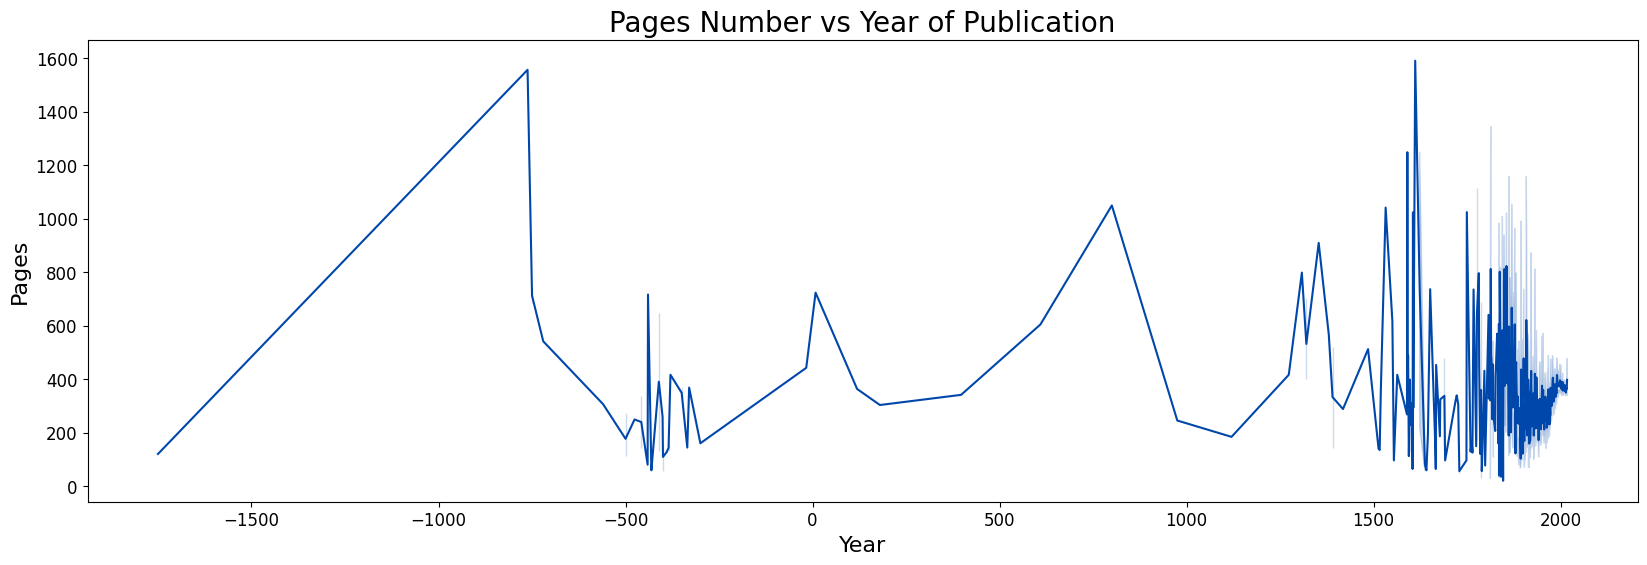

In [82]:
plt.figure(figsize = (20,6))
sns.lineplot(x = 'year', y = 'pages', data = Books, color='#0047AB')
plt.title('Pages Number vs Year of Publication', fontsize =20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Pages', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [83]:
books_after_1800 = Books[Books['year'] > 1800]

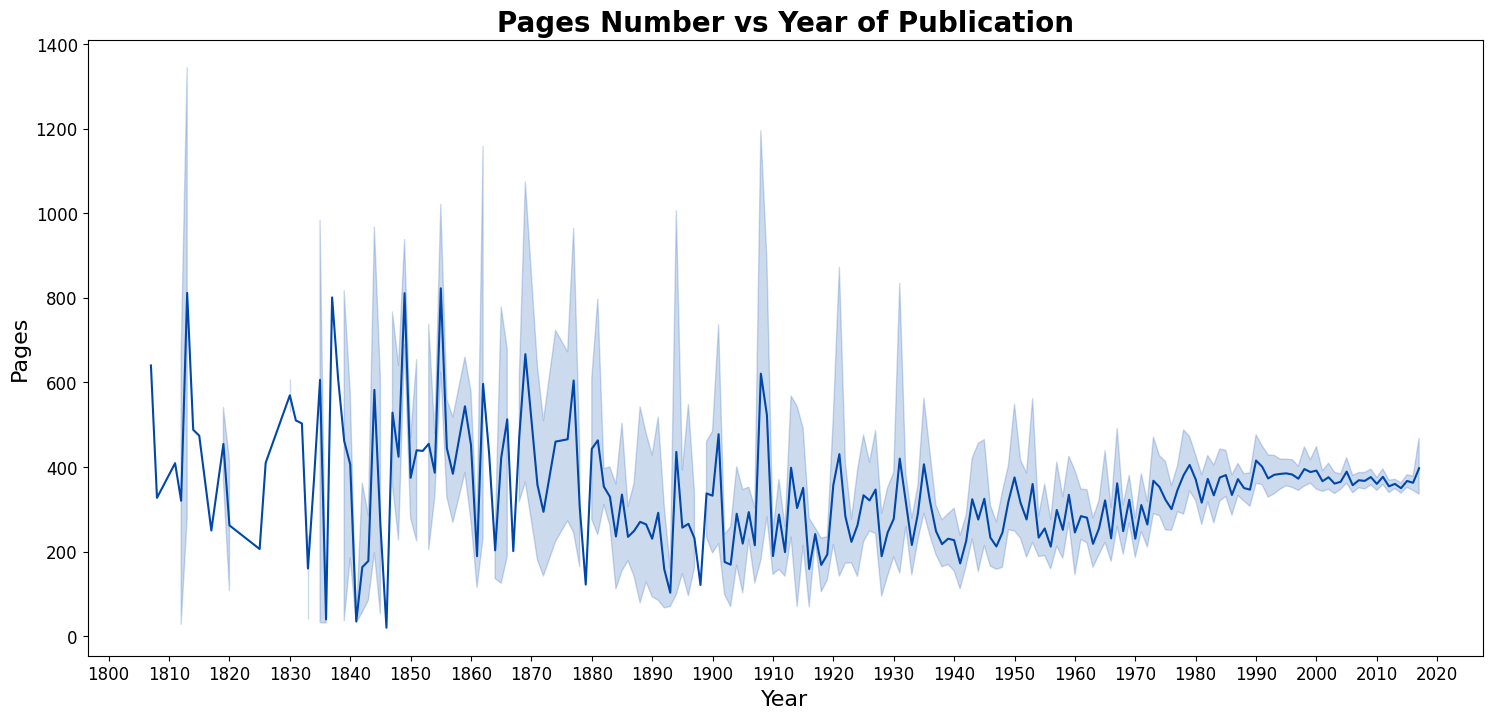

In [84]:

plt.figure(figsize = (18,8))
sns.lineplot(x = 'year', y = 'pages', data = books_after_1800, color='#0047AB')
plt.title('Pages Number vs Year of Publication', weight='bold', fontsize =20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Pages', fontsize=16)
plt.xticks(np.arange(1800, 2021, 10), fontsize=12)
plt.yticks(np.arange(0, 1401, 200), fontsize=12)
plt.show()

In [88]:
g = []
Books.genres.apply(lambda x: g.append(x) if ',' in x else [])
g[:5]

['youngadult, fiction, fantasy, sciencefiction, romance',
 'fantasy, fiction, youngadult, classics',
 'youngadult, fantasy, romance, fiction, paranormal',
 'classics, fiction, historicalfiction, youngadult',
 'classics, fiction, historicalfiction, romance']

In [89]:
#insert splitted author list in every row
genres_list = Books['genres'].apply(lambda x: [g for g in x.split(', ')] if ',' in x else x)
genres_list.head()

,genres
0,"[youngadult, fiction, fantasy, sciencefiction,..."
1,"[fantasy, fiction, youngadult, classics]"
2,"[youngadult, fantasy, romance, fiction, parano..."
3,"[classics, fiction, historicalfiction, youngad..."
4,"[classics, fiction, historicalfiction, romance]"


In [90]:
splitted_genres = genres_list.apply(lambda x: pd.Series(x)).stack().reset_index(level=1, drop=True)
splitted_genres.name = 'genres'
splitted_genres.head()

,genres
0,youngadult
0,fiction
0,fantasy
0,sciencefiction
0,romance


In [91]:
#remove previous author column and join the new splitted authors
book_genres = Books.drop('genres', axis=1).join(splitted_genres)

In [92]:
x = book_genres['genres']
y = book_genres['average_rating']

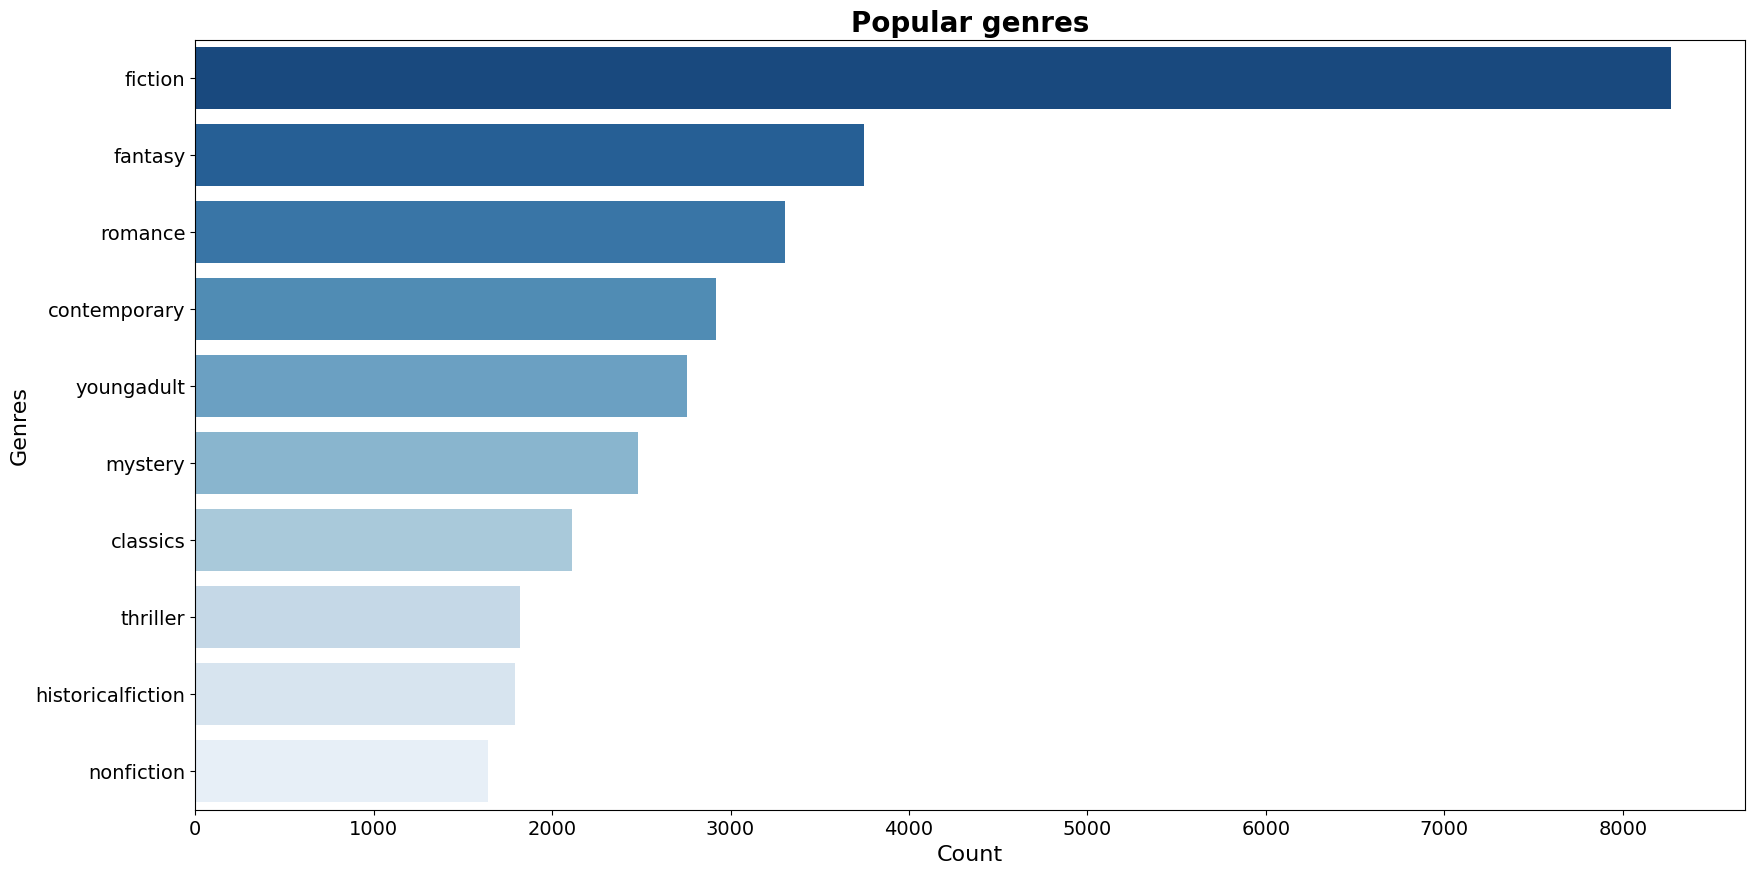

In [94]:
genres_rank = book_genres.genres.value_counts()

#visualize
plt.figure(figsize=(20,10))
sns.barplot(x=genres_rank.head(10).values,
            y=genres_rank.head(10).index,
            hue=genres_rank.head(10).index,
            palette = 'Blues_r')
plt.title('Popular genres', weight='bold', fontsize=20)
plt.xlabel('Count', fontsize=16)
plt.ylabel('Genres', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [96]:
Books.to_csv('/content/drive/MyDrive/BookData/books_trimmed.csv')